# Preparation

in this section, program will import required library and load the dataset

In [30]:
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_validate
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [31]:
sns.set()
warnings.filterwarnings('ignore')
%matplotlib inline

In [32]:
# Load the dataset
stroke_data = pd.read_csv('../data/health_data.csv')

# Remove column diabetes and hypertension as we don't need it
stroke_data = stroke_data.drop(columns=['Diabetes', 'Hypertension'])

# Data Comprehension

In this section, we will see general information about the dataset

In [33]:
# Get first 5 data in the dataset
stroke_data.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0


In [34]:
# Get data type and non-null data count for each column
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [35]:
# Get information about statistical data of each column
stroke_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0
Sex,70692.0,0.456997,0.498151,0.0,0.0,0.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0
Veggies,70692.0,0.788774,0.408181,0.0,1.0,1.0,1.0,1.0


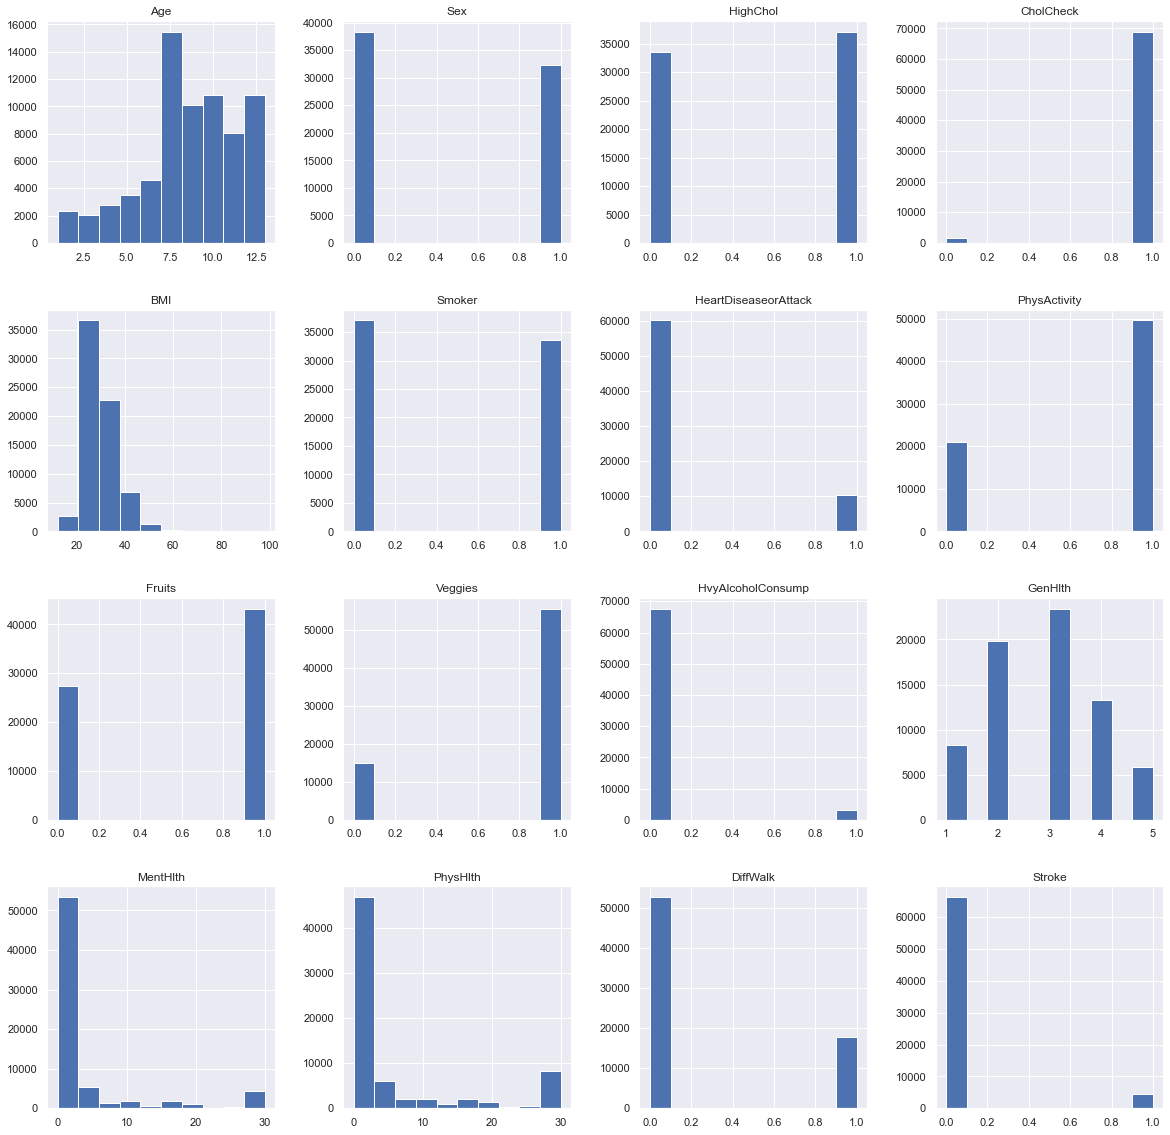

In [36]:
# Draw histogram plot for each column
p = stroke_data.hist(figsize=(20, 20))

In [37]:
# Get dataframe shape
stroke_data.shape

(70692, 16)

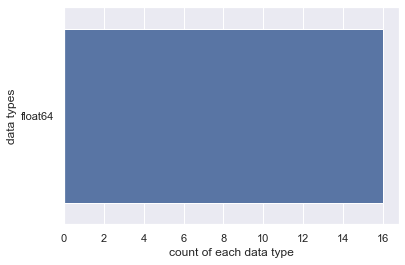

In [38]:
# Get count of each of data type in the dataframe
sns.countplot(y=stroke_data.dtypes ,data=stroke_data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

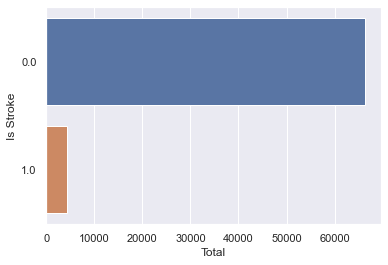

In [39]:
# Get total of each class in output column
sns.countplot(y='Stroke' ,data=stroke_data)
plt.xlabel("Total")
plt.ylabel("Is Stroke")
plt.show()

# Feature Selection

In this section, we will select 6 features with most correlation to target variable

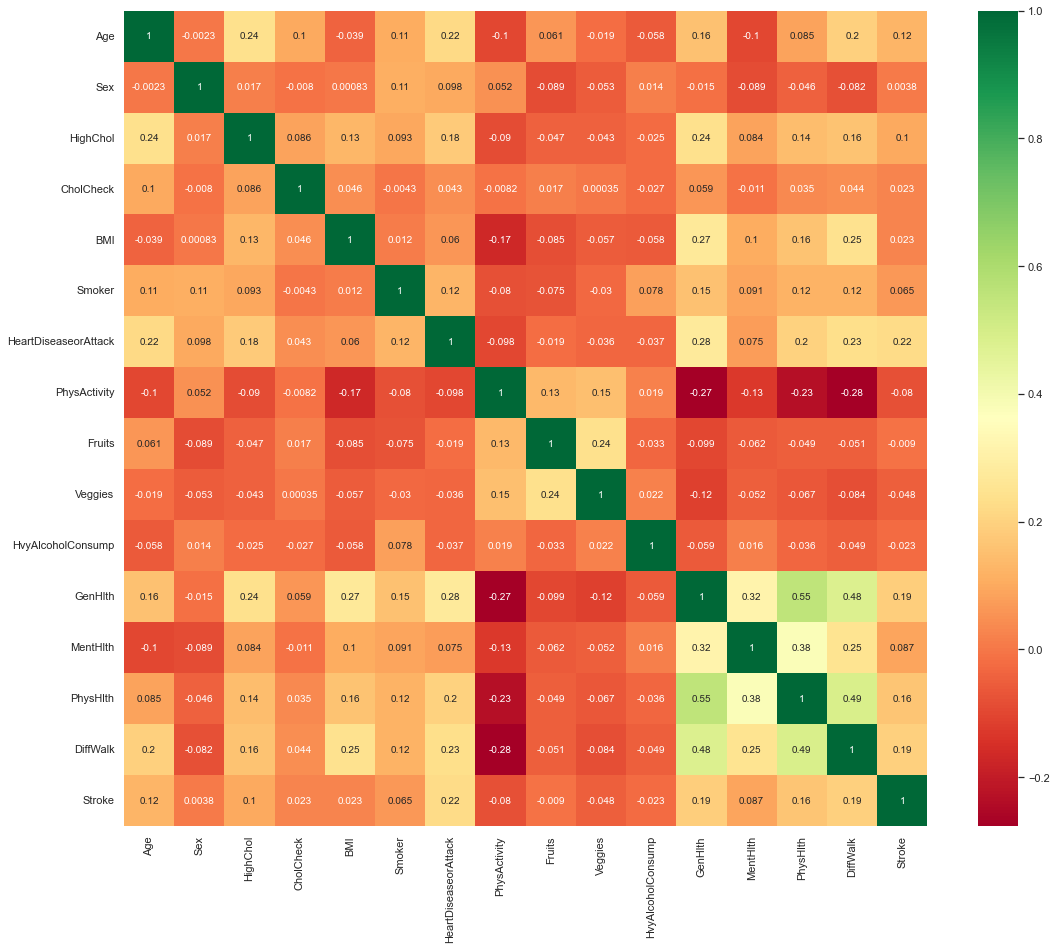

In [40]:
# Heatmap to find data correlation, especially between each column with stroke
plt.figure(figsize=(18,15))
p=sns.heatmap(stroke_data.corr(), annot=True,cmap ='RdYlGn')

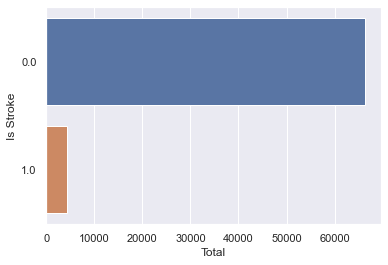

In [41]:
# Get total of each class in target variable
sns.countplot(y='Stroke' ,data=stroke_data)
plt.xlabel("Total")
plt.ylabel("Is Stroke")
plt.show()

In [42]:
X = stroke_data.loc[:,['Age', 'HighChol', 'HeartDiseaseorAttack', 'GenHlth', 'PhysHlth', 'DiffWalk']]
y = stroke_data['Stroke']

# Exploratory Data Analysis

In this section, we will explore dataset and its feature

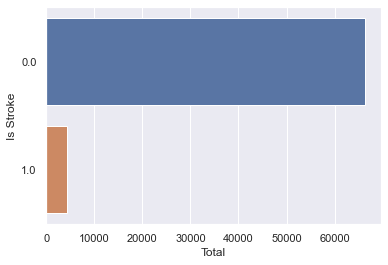

In [43]:
# Get total of each class in target variable
sns.countplot(y='Stroke' ,data=stroke_data)
plt.xlabel("Total")
plt.ylabel("Is Stroke")
plt.show()

In [44]:
def showStrokePercentage(ax):
    for i in range(len(ax.containers[0].patches)):
        firstPatches = ax.containers[0].patches[i]
        secondPatches = ax.containers[1].patches[i]
        num = firstPatches.get_height() / (firstPatches.get_height() + secondPatches.get_height())

        x = firstPatches.get_x()
        y = firstPatches.get_y()
        width = firstPatches.get_width()
        height = firstPatches.get_height()

        ax.text(x + width/2, y + height + 200, "{0:.2%}".format(num), ha='center')

def showTotal(ax):
    for i in range(len(ax.containers[0].patches)):
        firstPatches = ax.containers[0].patches[i]
        secondPatches = ax.containers[1].patches[i]
        num = firstPatches.get_height() + secondPatches.get_height()

        x = firstPatches.get_x()
        width = firstPatches.get_width()
        height = secondPatches.get_height()

        ax.text(x + width/2, height + 200, num, ha='center')

def showStrokePercentageCount(ax):
    for i in range(len(ax.containers[1].patches)):
        firstPatches = ax.containers[1].patches[i]
        secondPatches = ax.containers[0].patches[i]
        num = firstPatches.get_height() / (firstPatches.get_height() + secondPatches.get_height())

        x = firstPatches.get_x()
        y = firstPatches.get_y()
        width = firstPatches.get_width()
        height = firstPatches.get_height()

        ax.text(x + width/2, y + height + 200, "{0:.2%}".format(num), ha='center')

def showTotalCount(ax):
    ax.bar_label(ax.containers[0])

def stackedCount(ax):
    max_height = max([sum([ax.containers[i].patches[j].get_height() for i in range(len(ax.containers))]) for j in range(len(ax.containers[0].patches))])
    ax.set_ylim(ymax=max_height * 1.1)

    for i in range(len(ax.containers[0].patches)):
        ax.containers[0].patches[i].set_y(ax.containers[1].patches[i].get_height())

def showHistPlot(data, x, hue='Stroke', bins=10, isShowStrokePercentage=True, isShowTotal=False):
    fig, ax = plt.subplots(figsize=(10,10))
    ax = sns.histplot(data, x=x, hue=hue, multiple='stack', bins=bins, ax=ax)
    if isShowStrokePercentage : showStrokePercentage(ax)
    if isShowTotal: showTotal(ax)

def showCountPlot(data, x, hue='Stroke', isStacked=True, isShowStrokePercentage=True, isShowTotal=True):
    plt.subplots(figsize=(10,10))
    ax = sns.countplot(data, x=x,
                       hue=hue, dodge=(not isStacked)
                       )
    if isStacked : stackedCount(ax)
    if isShowStrokePercentage : showStrokePercentageCount(ax)
    if isShowTotal : showTotalCount(ax)

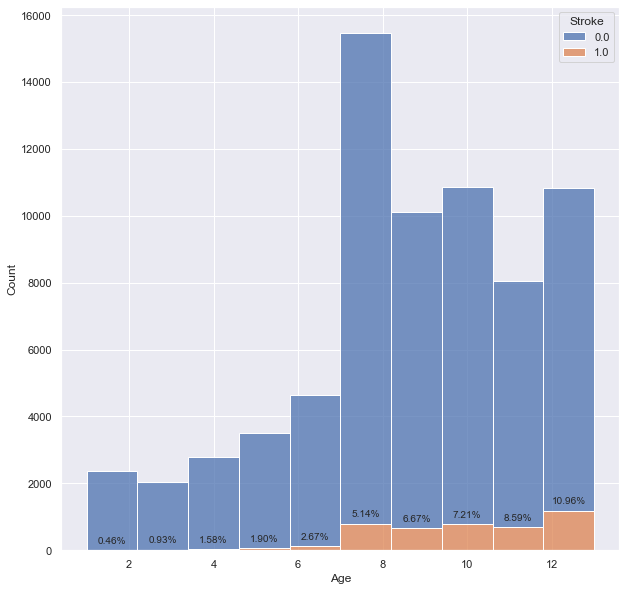

In [45]:
# 13-level age category (_AGEG5YR see codebook) 1 = 18-24, 9 = 60-64, 13 = 80 or olde
showHistPlot(stroke_data, 'Age')

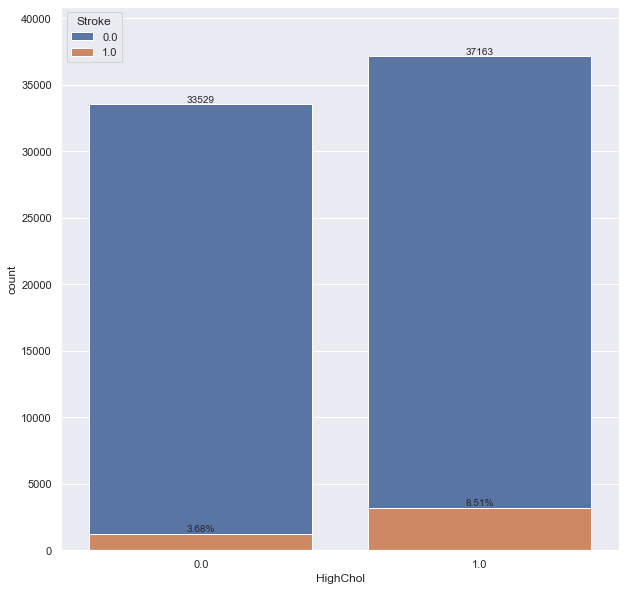

In [46]:
# 0 = no high cholesterol
# 1 = high cholesterol
showCountPlot(stroke_data, 'HighChol')

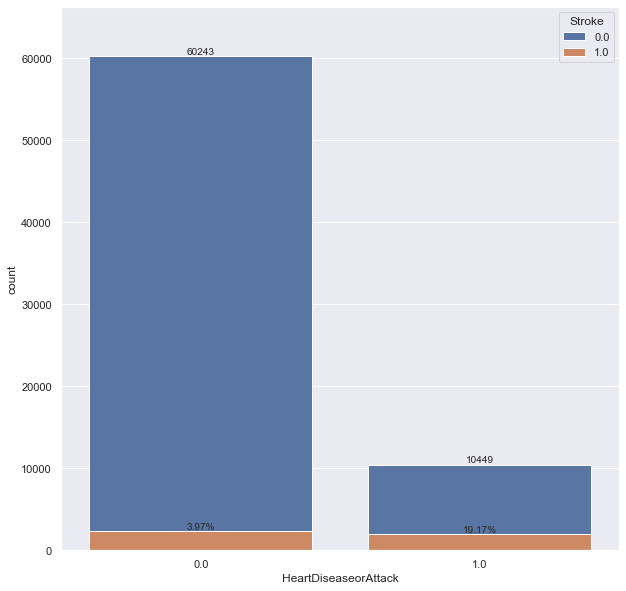

In [47]:
# coronary heart disease (CHD) or myocardial infarction (MI)
# 0 = no
# 1 = yes
showCountPlot(stroke_data, 'HeartDiseaseorAttack')

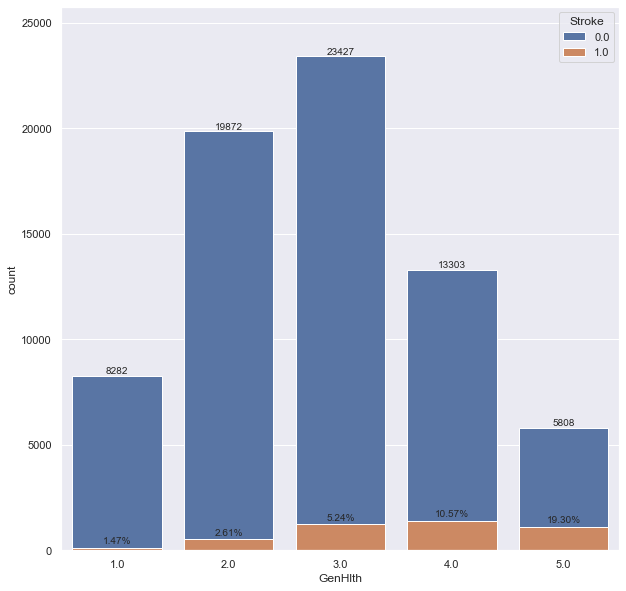

In [48]:
# Would you say that in general your health is: (scale 1-5)
# 1 = excellent
# 2 = very good
# 3 = good
# 4 = fair
# 5 = poor
showCountPlot(stroke_data, 'GenHlth')

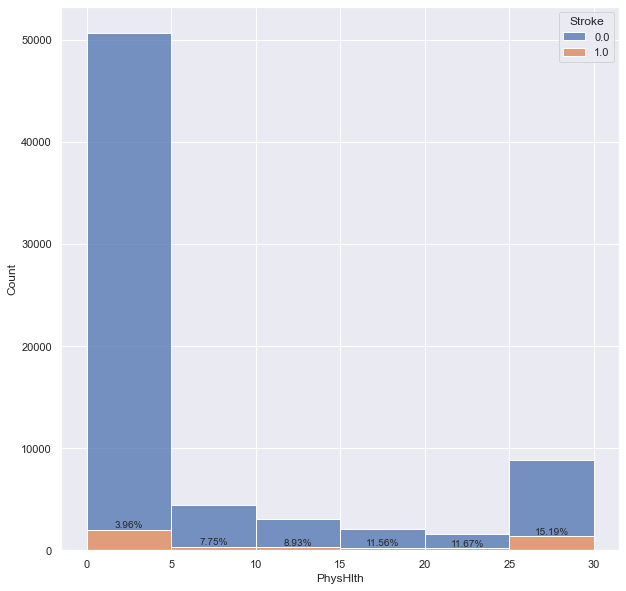

In [49]:
# physical illness or injury days in past 30 days scale 1-30
showHistPlot(stroke_data, 'PhysHlth',
             bins=6
             )

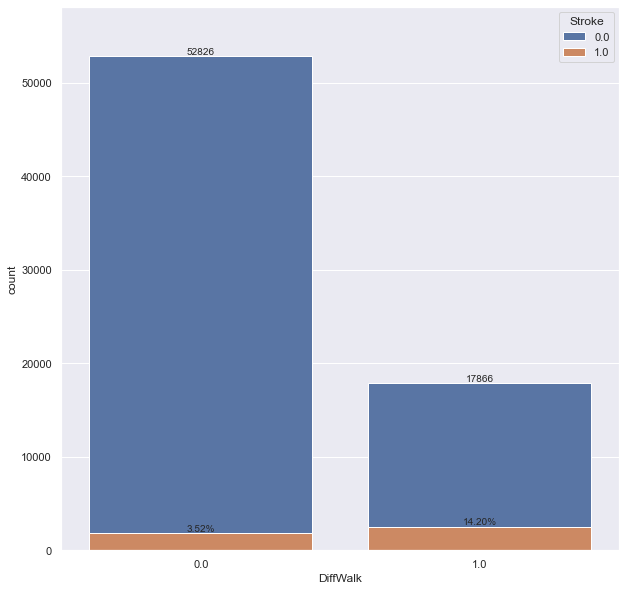

In [50]:
# Do you have serious difficulty walking or climbing stairs?
# 0 = no
# 1 = yes
showCountPlot(stroke_data, 'DiffWalk')

# Feature Scaling

In [51]:
scaler = StandardScaler()
normalized_stroke_data = pd.DataFrame(scaler.fit_transform(stroke_data.drop(columns=['Stroke'])), columns=stroke_data.drop(columns=['Stroke']).columns)

normalized_stroke_data.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk
0,-1.607237,1.090046,-1.052798,0.159276,-0.542176,-0.951711,-0.41647,0.649925,-1.255371,0.517485,-0.211251,0.146304,0.153020,2.404008,-0.581554
1,1.197681,1.090046,0.949850,0.159276,-0.542176,1.050740,-0.41647,-1.538638,0.796577,-1.932424,-0.211251,0.146304,-0.460058,-0.577451,-0.581554
2,1.548296,1.090046,-1.052798,0.159276,-0.542176,-0.951711,-0.41647,0.649925,0.796577,0.517485,-0.211251,-1.649743,-0.460058,0.416369,-0.581554
3,0.847066,1.090046,0.949850,0.159276,-0.261036,1.050740,-0.41647,0.649925,0.796577,0.517485,-0.211251,0.146304,-0.460058,-0.279305,-0.581554
4,-0.204778,-0.917392,-1.052798,0.159276,-0.120466,1.050740,-0.41647,0.649925,0.796577,0.517485,-0.211251,-0.751719,-0.460058,-0.577451,-0.581554


In [52]:
X = normalized_stroke_data
y = stroke_data['Stroke']

# Data Splitting

in this section, we will split the data into 90% training set and 10% test set

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1248)

# Data Balancing

In this section, we will oversampling the minority class

In [54]:
oversample = SMOTENC([1, 2, 3, 4, 5], random_state=1248)
X_train, y_train = oversample.fit_resample(X_train, y_train)

print(X_train.shape)
print(y_train.shape)

# stroke_data = pd.concat([X, y], axis=1)
# stroke_data.head()

(119296, 15)
(119296,)


# Train Model

In [55]:
%%time
from xgboost import XGBClassifier
model = XGBClassifier()

k_fold = KFold(10, shuffle=True, random_state=1248)
result = cross_validate(model, X_train, y_train, cv=k_fold, return_train_score=True, return_estimator=True, scoring=['accuracy', 'precision', 'recall', 'f1'])

[05:30:42] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:30:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:30:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:30:48] WARNING:

In [56]:
print('============|Train Metrics|============')
print('accuracy  :', result['train_accuracy'].mean())
print('precision :', result['train_precision'].mean())
print('recall    :', result['train_recall'].mean())
print('f1        :', result['train_f1'].mean(), '\n')

print('============|Validation Metrics|============')
print('accuracy  :', result['test_accuracy'].mean())
print('precision :', result['test_precision'].mean())
print('recall    :', result['test_recall'].mean())
print('f1        :', result['test_f1'].mean())

============|Train Metrics|============
accuracy  : 0.9380197162243414
precision : 0.9751848169332629
recall    : 0.8989145632733321
f1        : 0.9354973810527281 

============|Validation Metrics|============
accuracy  : 0.9329651169531491
precision : 0.9694104922053498
recall    : 0.8941557342897879
f1        : 0.9302550371478574


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def get_metrics_test(true_labels, predicted_labels):
    acc = np.round(accuracy_score(true_labels, predicted_labels),4)
    prec = np.round(precision_score(true_labels, predicted_labels,average='weighted'),4)
    rec = np.round(recall_score(true_labels, predicted_labels,average='weighted'),4)
    f1 = np.round(f1_score(true_labels, predicted_labels,average='weighted'),4)
    return [acc, prec, rec, f1]

# Test Model

Get all estimators from cross validation process, and for each estimator, do predict the test data and get performance metrics. In the end, all those correspond performance metrics will be averaged

In [58]:
import numpy as np
estimators = result['estimator']

metrics = {
    'acc': np.array([]),
    'prec': np.array([]),
    'rec': np.array([]),
    'f1': np.array([])
}

for estimator in estimators:
    y_pred = estimator.predict(X_test)
    [acc, prec, rec, f1] = get_metrics_test(y_test, y_pred)
    metrics['acc'] = np.append(metrics['acc'], acc)
    metrics['prec'] = np.append(metrics['prec'], prec)
    metrics['rec'] = np.append(metrics['rec'], rec)
    metrics['f1'] = np.append(metrics['f1'], f1)

In [59]:
print('============|Test Metrics|============')
print('accuracy  :', metrics['acc'].mean())
print('precision :', metrics['prec'].mean())
print('recall    :', metrics['rec'].mean())
print('f1        :', metrics['f1'].mean())

============|Test Metrics|============
accuracy  : 0.92208
precision : 0.9021899999999998
recall    : 0.92208
f1        : 0.91106


# Train Model (with tuning parameter)

In [61]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'objective': ['binary:logistic', 'binary:hinge', 'binary:logitraw'],
    'eta': [0.1, 0.2, 0.3, 0.4, 0.5],
    'max_depth': [5, 7, 10, 13, 16, 20],
    'min_child_weight': [0, 3, 5, 7, 10],
    'gamma': [1, 4, 7, 10],
    'eval_metric': ['logloss', 'error', 'auc']
}

model = XGBClassifier(n_jobs=-1)

grid_search = RandomizedSearchCV(model, param_grid, random_state=1248, n_iter=50, cv=k_fold, n_jobs=-1)

In [62]:
%%time
grid_search.fit(X_train, y_train)

Wall time: 22min 4s


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=1248, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_ch...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'eta': [0.1, 0.2, 0.3, 0.4, 0.5],
                                        'eval_metric': ['logloss', 'error',
                                                        'auc'],
                                        'gamma': [1, 4, 7, 10],
                                        'max_depth': [5, 7, 10, 13, 16, 20],
                                        'min_child_weight': [0, 3, 5, 7, 10],
                                        'objective': ['binary:logistic',
                                                      'binary:hinge',
                                                      'binary:logitraw']},
                   random_state=1248)

In [63]:
grid_search.best_params_, grid_search.best_score_, grid_search.best_estimator_

({'objective': 'binary:logitraw',
  'min_child_weight': 0,
  'max_depth': 16,
  'gamma': 1,
  'eval_metric': 'error',
  'eta': 0.4},
 0.9515323367926337,
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               eta=0.4, eval_metric='error', gamma=1, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               learning_rate=0.400000006, max_delta_step=0, max_depth=16,
               min_child_weight=0, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=-1, num_parallel_tree=1,
               objective='binary:logitraw', predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, ...))

# Test Model (with tuning parameter)

In [64]:
y_pred = grid_search.best_estimator_.predict(X_test)
[acc, prec, rec, f1] = get_metrics_test(y_test, y_pred)

In [65]:
print('============|Test Metrics|============')
print('accuracy  :', metrics['acc'].mean())
print('precision :', metrics['prec'].mean())
print('recall    :', metrics['rec'].mean())
print('f1        :', metrics['f1'].mean())

============|Test Metrics|============
accuracy  : 0.92208
precision : 0.9021899999999998
recall    : 0.92208
f1        : 0.91106
